## Solving a Regression Problem using ANN:

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# SPLITTING THE DATA INTO DEPENDENT(y) AND INDEPENDENT(X) FEATURES
X = pd.DataFrame(housing.data, columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
housing.target_names

['MedHouseVal']

In [10]:
y = pd.DataFrame(housing.target, columns=housing.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
X.shape

(20640, 8)

In [12]:
y.shape

(20640, 1)

In [13]:
# SPLITTING INTO TRAIN_FULL AND TEST DATA:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)

# SPLITTING INTO TRAIN AND VALID DATA FROM TRAIN_FULL DATA:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [16]:
print(X_train_full.shape)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(15480, 8)
(11610, 8)
(5160, 8)
(3870, 8)


In [17]:
print(y_train_full.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(15480, 1)
(11610, 1)
(5160, 1)
(3870, 1)


In [21]:
# AS THERE ARE 8 INPUT FEATURES IN THE TRAINING DATASET:
X_train.shape[1]

8

In [23]:
LAYERS = [
    tf.keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    # INPUT_SHAPE = NO OF INPUT FEATURES = X_train.shape[1:] = 8 , 30 NEURONS

    tf.keras.layers.Dense(10,activation="relu"),

    tf.keras.layers.Dense(5,activation="relu"),

    tf.keras.layers.Dense(1,name="outputLayer")
    # AS IT IS A REGRESSION PROBLEM , THEREFORE NO ACTIVATION FUNCTION
]

In [24]:
model = tf.keras.models.Sequential(LAYERS)

In [25]:
model.layers

In [26]:
LOSS = "mse"
OPTIMIZER = "sgd"
model.compile(optimizer= OPTIMIZER, loss= LOSS)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 outputLayer (Dense)         (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 8 INPUT FEATURES * 30 NEURONS + BIASES(OF 30 NEURONS)
8*30 + 30

270

In [29]:
# 30 NEURONS IN HL_1 * 10 NEURONS IN HL_2 + BIASES(OF 10 NEURONS)
30*10 + 10

310

In [32]:
# 10 NEURONS IN HL_2 * 5 NEURONS IN HL_3 + BIASES(OF 5 NEURONS)
10*5 + 5

55

In [33]:
# 5 NEURONS IN HL_3 * 1 NEURONS IN OUTPUT_LAYER + BIASES(OF 1 NEURONS)
5*1 + 1

6

In [34]:
# SCALING THE DATA:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
EPOCHS = 30
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3203 - val_loss: 0.2995
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3183 - val_loss: 0.3128
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3253 - val_loss: 0.3056
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3152 - val_loss: 0.2941
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3138 - val_loss: 0.2953
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3112 - val_loss: 0.2996
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3102 - val_loss: 0.3063
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3079 - val_loss: 0.2987
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3074 - val_loss: 0.2915
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3056 - val_loss: 0.2942

In [37]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.320257,0.299539
1,0.318276,0.312767
2,0.325298,0.305630
3,0.315230,0.294147
4,0.313842,0.295301
5,0.311171,0.299626
6,0.310249,0.306256
7,0.307884,0.298701
8,0.307368,0.291518
9,0.305647,0.294178


<Axes: >

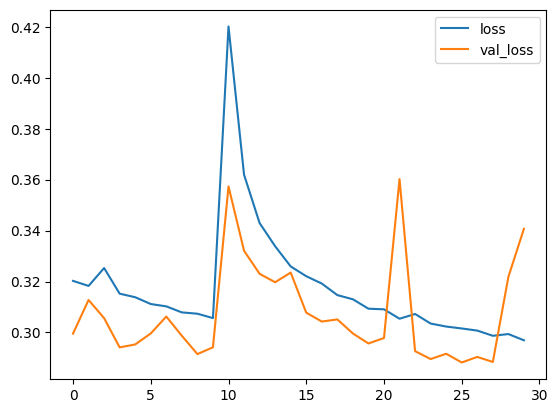

In [38]:
pd.DataFrame(history.history).plot()

In [39]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3044


0.3044077455997467

In [54]:
new = X_test[1]
new

array([-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
       -0.11818174, -0.23725261,  0.06215231])

In [55]:

new.reshape((1,8))

array([[-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231]])

In [56]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100


In [57]:
y_pred = model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 15ms/step


In [58]:
y_pred

array([[1.0948888]], dtype=float32)

In [59]:
## Model with callback

In [61]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2882 - val_loss: 0.2813
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2882 - val_loss: 0.2829
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2881 - val_loss: 0.2822
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.2878 - val_loss: 0.2827
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2877 - val_loss: 0.2823
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2875 - val_loss: 0.2810
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2875 - val_loss: 0.2820
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2872 - val_loss: 0.2823
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.2871 - val_loss: 0.2825
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2871 - val_loss: 0.2826

In [62]:
%load_ext tensorboard

In [63]:
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>